**ЛР 2 Классификация**

Булатова Ксения

Грппа: ПМИ - 24 НМ

**Загрузка данных**

Данные для исследования [здесь](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette('husl')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
dataset = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [4]:
dataset.drop(columns=['Person ID'], inplace=True)
dataset.drop(columns=['Occupation'], inplace=True)

In [5]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
dataset[['Gender']] = enc.fit_transform(dataset[['Gender']])

In [6]:
dataset['BMI Category'].replace('Normal Weight', 'Normal', inplace=True)
dataset['BMI Category'].replace('Obese', 'Overweight', inplace=True)
dataset['Sleep Disorder'].replace('Sleep Apnea', 'Insomnia', inplace=True)
dataset['Sleep Disorder'].fillna("No insomnia", inplace = True)

<ipython-input-6-758ce334b161>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['BMI Category'].replace('Normal Weight', 'Normal', inplace=True)
<ipython-input-6-758ce334b161>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [7]:
enc1 = OrdinalEncoder()
dataset[['BMI Category']] = enc1.fit_transform(dataset[['BMI Category']])
enc2 = OrdinalEncoder()
dataset[['Sleep Disorder']] = enc2.fit_transform(dataset[['Sleep Disorder']])

In [8]:
dataset.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1.0,27,6.1,6,42,6,1.0,126/83,77,4200,1.0
1,1.0,28,6.2,6,60,8,0.0,125/80,75,10000,1.0
2,1.0,28,6.2,6,60,8,0.0,125/80,75,10000,1.0
3,1.0,28,5.9,4,30,8,1.0,140/90,85,3000,0.0
4,1.0,28,5.9,4,30,8,1.0,140/90,85,3000,0.0


In [9]:
dataset.drop(columns=['Blood Pressure'], inplace=True)

In [10]:
#dataset['Quality of Sleep'] = dataset['Quality of Sleep'].map({4: 0, 5: 1, 6: 2, 7: 3, 8: 4, 9: 5})

In [11]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler

scaler_mm = MinMaxScaler()

dataset[['mmAge', 'mmPhysical Activity Level', 'mmHeart Rate', 'mmDaily Steps']] = scaler_mm.fit_transform(dataset[['Age', 'Physical Activity Level', 'Heart Rate', 'Daily Steps']])
dataset.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,mmAge,mmPhysical Activity Level,mmHeart Rate,mmDaily Steps
0,1.0,27,6.1,6,42,6,1.0,77,4200,1.0,0.00000,0.2,0.571429,0.171429
1,1.0,28,6.2,6,60,8,0.0,75,10000,1.0,0.03125,0.5,0.476190,1.000000
2,1.0,28,6.2,6,60,8,0.0,75,10000,1.0,0.03125,0.5,0.476190,1.000000
3,1.0,28,5.9,4,30,8,1.0,85,3000,0.0,0.03125,0.0,0.952381,0.000000
4,1.0,28,5.9,4,30,8,1.0,85,3000,0.0,0.03125,0.0,0.952381,0.000000


In [12]:
dataset.drop(columns=['Age'], inplace=True)
dataset.drop(columns=['Physical Activity Level'], inplace=True)
dataset.drop(columns=['Heart Rate'], inplace=True)
dataset.drop(columns=['Daily Steps'], inplace=True)
dataset.head()

,Gender,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Sleep Disorder,mmAge,mmPhysical Activity Level,mmHeart Rate,mmDaily Steps
0,1.0,6.1,6,6,1.0,1.0,0.00000,0.2,0.571429,0.171429
1,1.0,6.2,6,8,0.0,1.0,0.03125,0.5,0.476190,1.000000
2,1.0,6.2,6,8,0.0,1.0,0.03125,0.5,0.476190,1.000000
3,1.0,5.9,4,8,1.0,0.0,0.03125,0.0,0.952381,0.000000
4,1.0,5.9,4,8,1.0,0.0,0.03125,0.0,0.952381,0.000000


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     374 non-null    float64
 1   Sleep Duration             374 non-null    float64
 2   Quality of Sleep           374 non-null    int64  
 3   Stress Level               374 non-null    int64  
 4   BMI Category               374 non-null    float64
 5   Sleep Disorder             374 non-null    float64
 6   mmAge                      374 non-null    float64
 7   mmPhysical Activity Level  374 non-null    float64
 8   mmHeart Rate               374 non-null    float64
 9   mmDaily Steps              374 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 29.3 KB


**Анализ данных**

In [14]:
dataset.shape

(374, 10)

In [15]:
dataset.head(10)

,Gender,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Sleep Disorder,mmAge,mmPhysical Activity Level,mmHeart Rate,mmDaily Steps
0,1.0,6.1,6,6,1.0,1.0,0.00000,0.200000,0.571429,0.171429
1,1.0,6.2,6,8,0.0,1.0,0.03125,0.500000,0.476190,1.000000
2,1.0,6.2,6,8,0.0,1.0,0.03125,0.500000,0.476190,1.000000
3,1.0,5.9,4,8,1.0,0.0,0.03125,0.000000,0.952381,0.000000
4,1.0,5.9,4,8,1.0,0.0,0.03125,0.000000,0.952381,0.000000
5,1.0,5.9,4,8,1.0,0.0,0.03125,0.000000,0.952381,0.000000
6,1.0,6.3,6,7,1.0,0.0,0.06250,0.166667,0.809524,0.071429
7,1.0,7.8,7,6,0.0,1.0,0.06250,0.750000,0.238095,0.714286
8,1.0,7.8,7,6,0.0,1.0,0.06250,0.750000,0.238095,0.714286
9,1.0,7.8,7,6,0.0,1.0,0.06250,0.750000,0.238095,0.714286


In [16]:
import mpl_toolkits.mplot3d

from sklearn import datasets
from sklearn.cluster import KMeans

In [17]:
dataset['Quality of Sleep'].unique()

array([6, 4, 7, 5, 8, 9])

In [18]:
dataset['Quality of Sleep'].value_counts()

,count
Quality of Sleep,
8,109
6,105
7,77
9,71
5,7
4,5


In [19]:
dataset.describe()

,Gender,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Sleep Disorder,mmAge,mmPhysical Activity Level,mmHeart Rate,mmDaily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.505348,7.132086,7.312834,5.385027,0.422460,0.585561,0.474515,0.486185,0.245989,0.545264
std,0.500641,0.795657,1.196956,1.774526,0.494613,0.493285,0.271035,0.347180,0.196937,0.231131
min,0.000000,5.800000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.400000,6.000000,4.000000,0.000000,0.000000,0.257812,0.250000,0.142857,0.371429
50%,1.000000,7.200000,7.000000,5.000000,0.000000,1.000000,0.500000,0.500000,0.238095,0.571429
75%,1.000000,7.800000,8.000000,7.000000,1.000000,1.000000,0.718750,0.750000,0.333333,0.714286
max,1.000000,8.500000,9.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Визуализация данных**

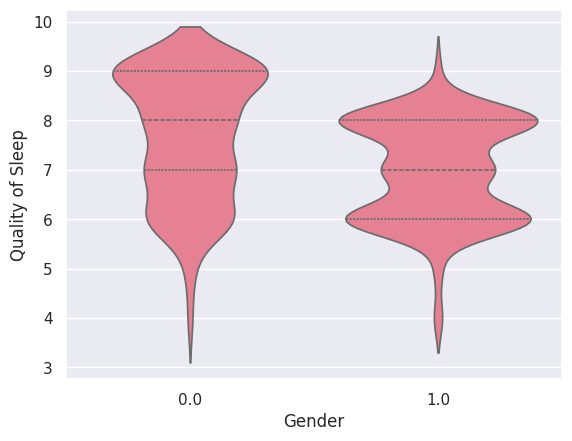

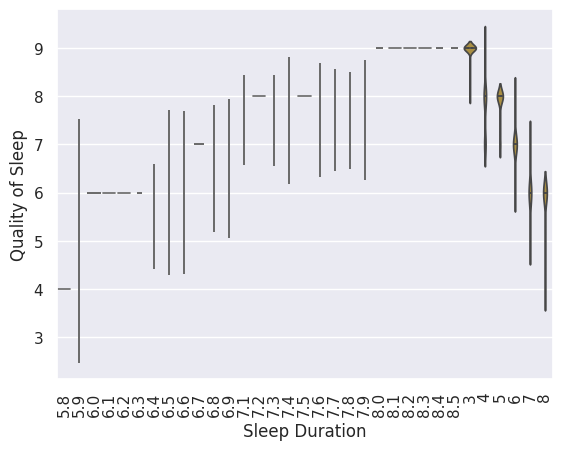

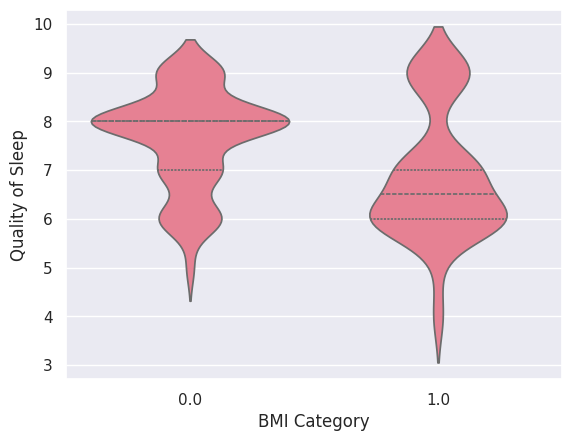

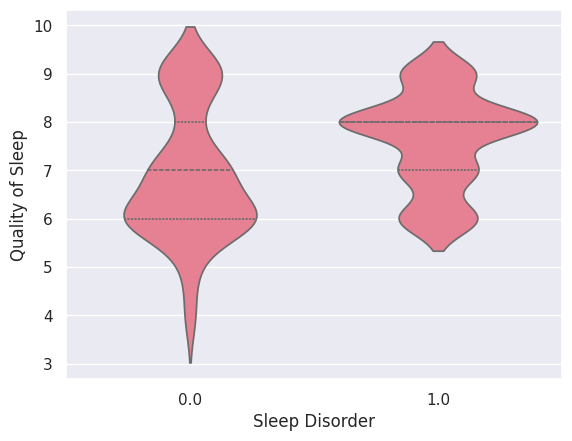

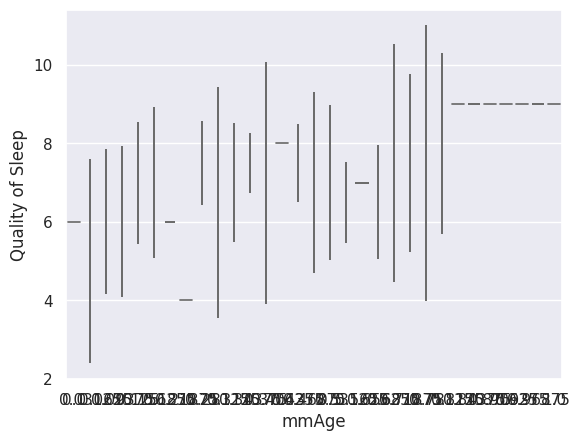

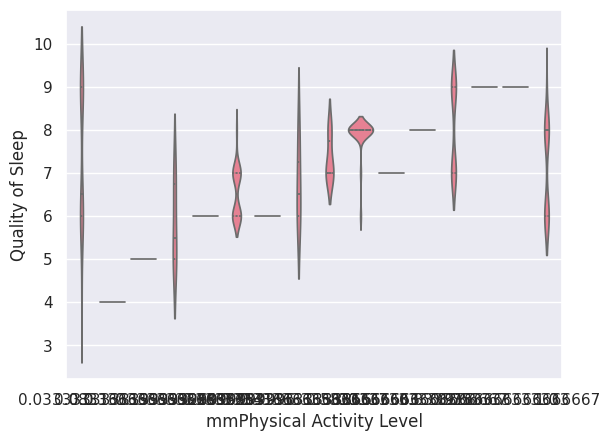

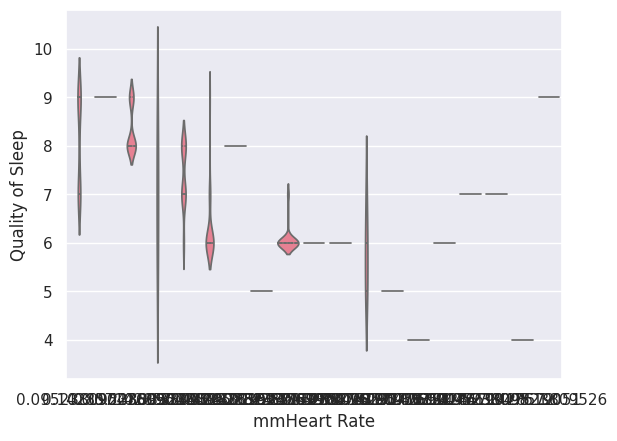

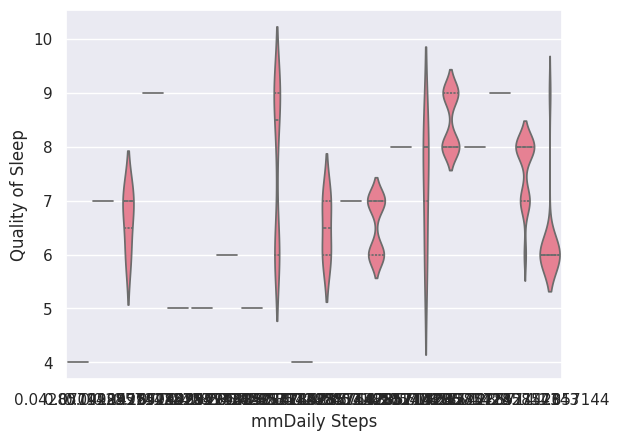

In [20]:
sns.violinplot(y='Quality of Sleep', x='Gender', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Quality of Sleep', x='Sleep Duration', data=dataset, inner='quartile')
plt.xticks(rotation=90)
sns.violinplot(y='Quality of Sleep', x='Stress Level', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Quality of Sleep', x='BMI Category', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Quality of Sleep', x='Sleep Disorder', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Quality of Sleep', x='mmAge', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Quality of Sleep', x='mmPhysical Activity Level', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Quality of Sleep', x='mmHeart Rate', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Quality of Sleep', x='mmDaily Steps', data=dataset, inner='quartile')
plt.show()

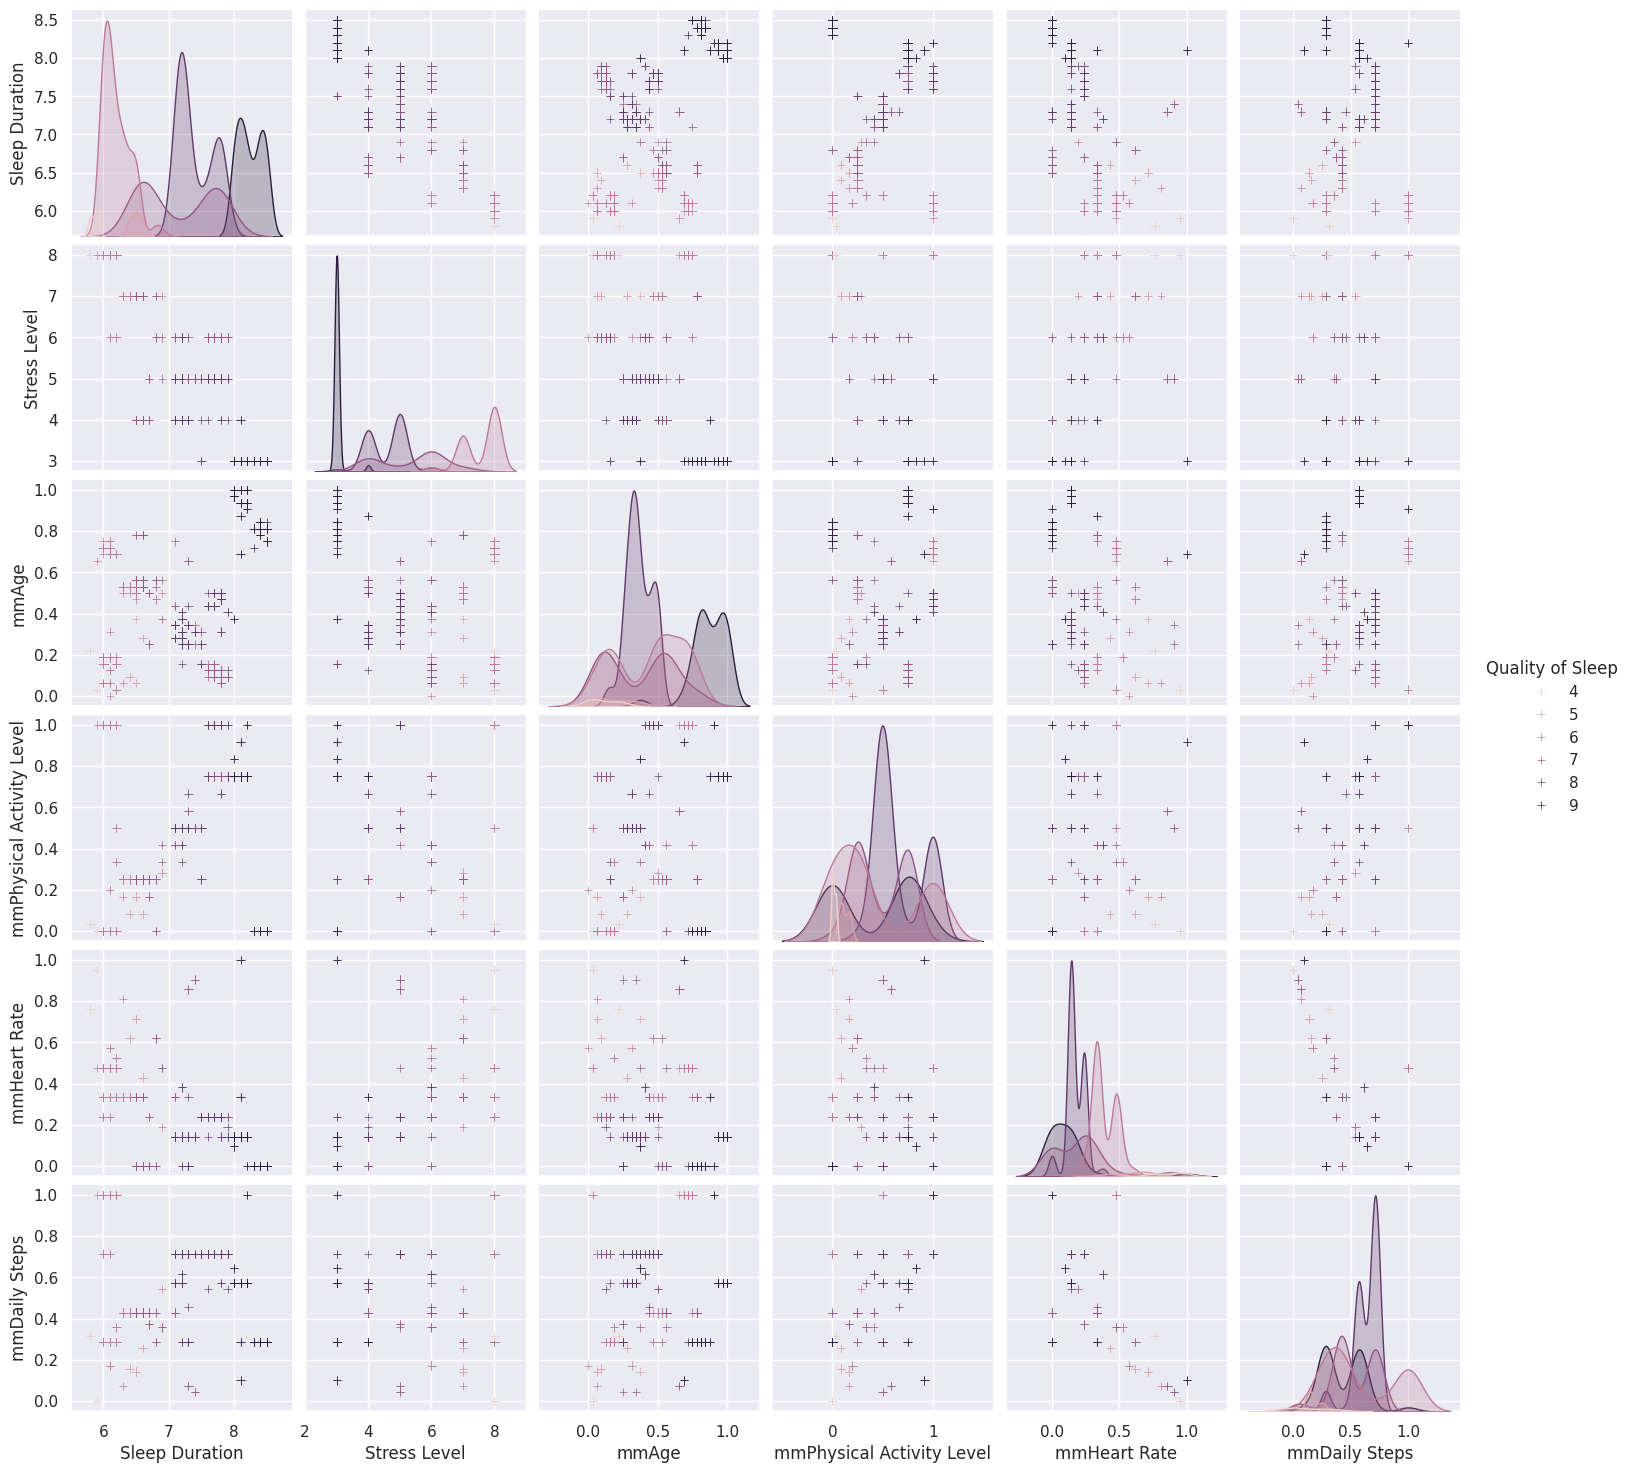

In [21]:
sns.pairplot(dataset, hue='Quality of Sleep', x_vars=["Sleep Duration", "Stress Level", "mmAge", "mmPhysical Activity Level", "mmHeart Rate", "mmDaily Steps"], y_vars=["Sleep Duration", "Stress Level", "mmAge", "mmPhysical Activity Level", "mmHeart Rate", "mmDaily Steps"], markers='+')
plt.show()

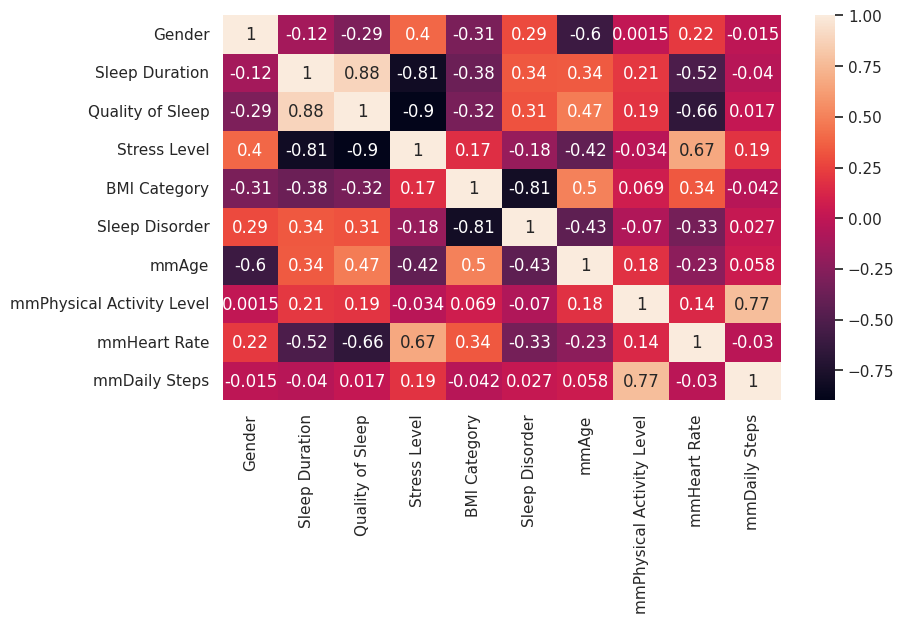

In [22]:
plt.figure(figsize=(9,5))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

**Построение модели**

Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец Quality of Sleep.

В X складываем весь набор данных без целевой переменной.

In [23]:
X = dataset.drop(['Quality of Sleep'], axis=1)
y = dataset['Quality of Sleep']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (374, 9) | y shape: (374,) 


In [24]:

y_mapped = y.map({4: 0, 5: 1, 6: 2, 7: 3, 8: 4, 9: 5})

X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.20, random_state=15, stratify=y)


TtestResult(statistic=-0.0579075092138788, pvalue=0.9538533938386223, df=372.0)

In [53]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  # print(cv_results)
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.923098 (0.024884)
LDA: 0.926431 (0.012414)
KNN: 0.936397 (0.031059)
CART: 0.933098 (0.028704)
NB: 0.815859 (0.055213)
SVC: 0.926465 (0.018715)


CART

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, y_train)

cart_pred_res = cart_model.predict(X_test)
cart_accuracy = accuracy_score(y_test, cart_pred_res)

print(f'CART accuracy: {cart_accuracy}')
print(f'CART prediction: {cart_pred_res}')

CART accuracy: 1.0
CART prediction: [2 4 5 3 2 0 5 4 3 5 4 2 4 3 4 5 3 2 3 4 2 3 2 5 3 4 4 4 5 2 5 4 2 2 3 2 2
 4 5 4 2 5 2 4 2 3 4 3 2 5 4 2 3 5 2 1 3 4 4 3 5 2 4 3 3 4 2 4 2 5 3 4 5 4
 2]


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: title={'center': 'CART surface with original features'}>

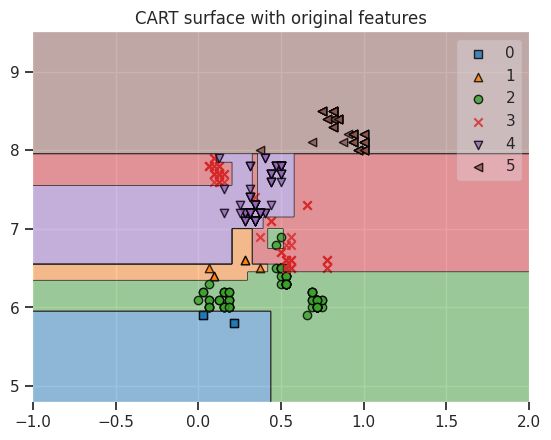

In [55]:
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d

y_s1 = y_train
X_2d1= X_train[['mmAge',	'Sleep Duration']].values

y_2d1 = y_s1.values


sk_lda11 = DecisionTreeClassifier()
sk_lda11.fit(X_2d1, y_2d1)

plt.title('CART surface with original features')
plot_decision_regions(
    	X=X_2d1,
    	y=y_2d1,
    	clf=sk_lda11)

In [56]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [57]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## Accuray e AUC
'''
Теперь смотрим метрики.
НА ТЕСТОВОМ ДАТАСЕТЕ
'''
accuracy = metrics.accuracy_score(y_test, predicted)#Оценим точность классификации.

'''
Получим результат
'''

## Precision e Recall
recall = metrics.recall_score(y_test, predicted, average="weighted")
precision = metrics.precision_score(y_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 1.0
Precision (confidence when predicting a 1): 1.0
Detail:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        14

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

